In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import itertools
from scipy.optimize import curve_fit


In [3]:
C_vs_I_r_0 = pd.read_csv("DATA/C_vs_I_r_0.csv")
C_vs_I_r_22  = pd.read_csv("DATA/C_vs_I_r_22.csv")

In [4]:
C_vs_I_r_0

,C (F-divisions),I (microampere)
0,0,0
1,10,0
2,20,0
3,30,0
4,40,0
5,50,0
6,60,0
7,70,1
8,80,4
9,90,39


In [5]:
def gaussian(x, a, mu, sigma):
    return a * np.exp(-((x - mu)**2) / (2 * sigma**2))


In [6]:
output_directory = "output_plots/" 
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

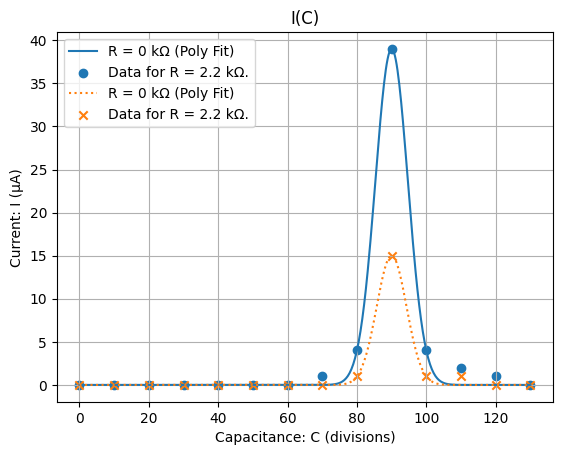

In [7]:
data_list = [C_vs_I_r_0, C_vs_I_r_22]
markers = itertools.cycle(['o','x'])
linestyles = itertools.cycle(['-', ':'])
configurations = itertools.cycle(["R = 0 kΩ", "R = 2.2 kΩ"])

for data in data_list:
    marker = next(markers)
    linestyle = next(linestyles)
    config_label = next(configurations)
    x, y = data["C (F-divisions)"], data["I (microampere)"]
    
    initial_guess = [max(y), np.mean(x), np.std(x)]

    popt, pcov = curve_fit(gaussian, x, y, p0=initial_guess)
    x_linspace = np.linspace(min(x),max(x),500)
    plt.plot(x_linspace, gaussian(x_linspace, *popt), label=f'{config_label} (Poly Fit)',linestyle=linestyle)

    plt.scatter(x,y, marker=marker, label =f"Data for {next(configurations)}.")
    plt.xlabel("Capacitance: C (divisions)")
    plt.ylabel("Current: I (µA)")
    plt.grid(1)
    plt.title("I(C)")
    plt.legend()
    plt.savefig(f"{output_directory}current_vs_Capacitance.png",dpi=300)